In [50]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

In [51]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [52]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [53]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [54]:
model = model_fn()

In [55]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [56]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

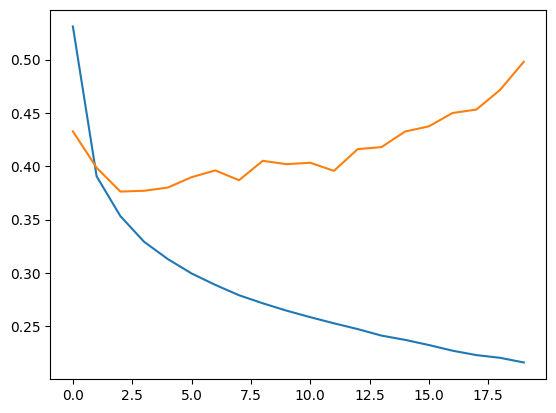

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
plt.show()

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ Layer       ┃ Output   ┃ Par… ┃
┃ (type)      ┃ Shape    ┃    # ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ flatten_3   │ (None,   │    0 │
│ (Flatten)   │ 784)     │      │
├─────────────┼──────────┼──────┤
│ dense_6     │ (None,   │ 78,… │
│ (Dense)     │ 100)     │      │
├─────────────┼──────────┼──────┤
│ dropout_1   │ (None,   │    0 │
│ (Dropout)   │ 100)     │      │
├─────────────┼──────────┼──────┤
│ dense_7     │ (None,   │ 1,0… │
│ (Dense)     │ 10)      │      │
└─────────────┴──────────┴──────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True) # 제일 좋은 모델 하나만 저장
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

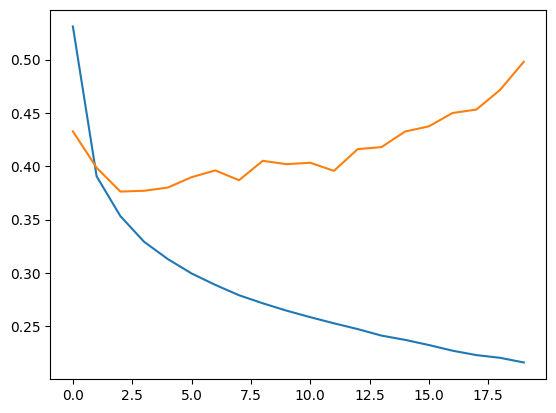

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [61]:
model.save_weights('model.weights.h5')

In [62]:
model.save('mymodel.keras')